In [18]:
print("hi")

hi


In [19]:
from ultralytics import YOLO
import os
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

In [20]:
# Load the YOLO model
base_dir = '/home/ian/intellicook/ingredient-recognition/model'
weights_path = os.path.join(base_dir, 'train/runs/detect/train/weights/best.pt')
model = YOLO(weights_path)

In [21]:
# Validate the model
data_path = os.path.join(base_dir, 'data/Food Ingredient Recognition.v4i.yolov11/data.yaml')
results = model.val(data=data_path, split='val')

Ultralytics 8.3.55 🚀 Python-3.12.2 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24195MiB)
YOLO11m summary (fused): 303 layers, 20,077,063 parameters, 0 gradients, 67.9 GFLOPs


val: Scanning /home/ian/intellicook/ingredient-recognition/model/data/Food Ingredient Recognition.v4i.yolov11/valid/labels.cache... 780 images, 67 backgrounds, 0 corrupt: 100%|██████████| 780/780 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:04<00:00, 11.94it/s]


                   all        780       2517        0.8      0.815      0.858      0.594
                 apple         10         20      0.947        0.9      0.919       0.81
             asparagus         12         47      0.532      0.298      0.371      0.117
               avocado         13         49      0.934      0.871      0.963      0.709
                banana         15         25      0.768       0.92      0.878      0.633
           bell pepper         13         59      0.851      0.972      0.966      0.544
          bitter gourd         10         33      0.581      0.606      0.625      0.258
              bok choy         17         49      0.752      0.682      0.796      0.337
              broccoli          7         27      0.833      0.889      0.886      0.498
               cabbage         10         19      0.864      0.947      0.969      0.674
                carrot         14         39      0.705      0.538      0.672      0.267
                cashe

In [22]:
# Extract metrics
metrics = results.results_dict
print(metrics.keys())

for key in metrics:
    print(f"{key}: {metrics[key]}")

dict_keys(['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'fitness'])
metrics/precision(B): 0.8000694712113787
metrics/recall(B): 0.8150705497445575
metrics/mAP50(B): 0.8577925524501078
metrics/mAP50-95(B): 0.5935191361677661
fitness: 0.6199464777960002


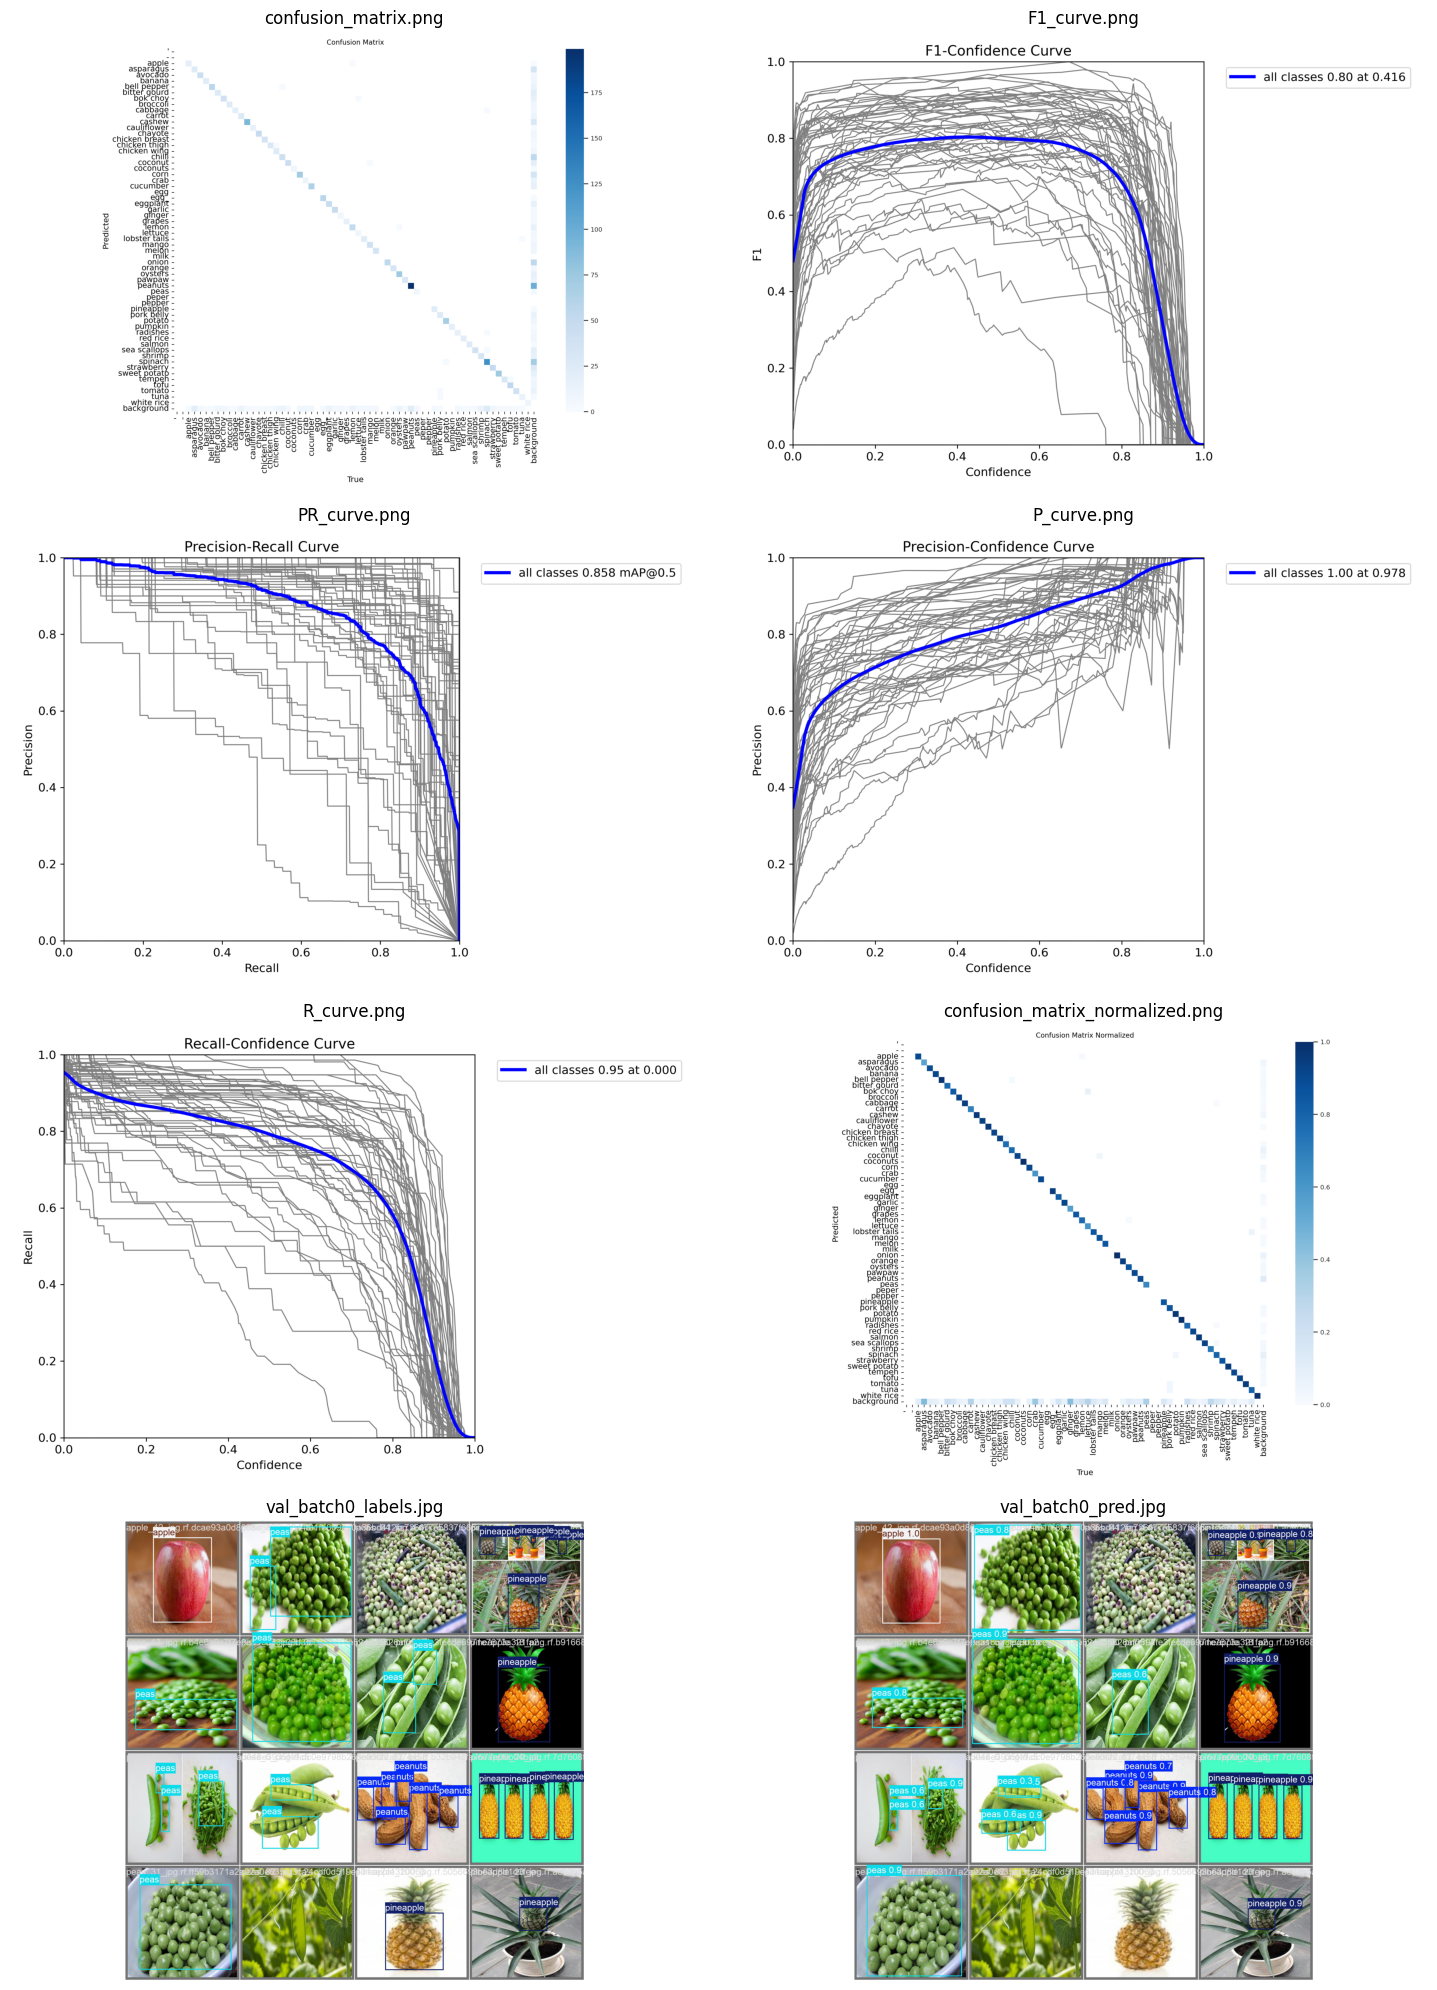

In [23]:
image_paths = [
  os.path.join(base_dir, 'train/runs/detect/val/confusion_matrix.png'),
  os.path.join(base_dir, 'train/runs/detect/val/F1_curve.png'),
  os.path.join(base_dir, 'train/runs/detect/val/PR_curve.png'),
  os.path.join(base_dir, 'train/runs/detect/val/P_curve.png'),
  os.path.join(base_dir, 'train/runs/detect/val/R_curve.png'),
  os.path.join(base_dir, 'train/runs/detect/val/confusion_matrix_normalized.png'),
  os.path.join(base_dir, 'train/runs/detect/val/val_batch0_labels.jpg'),
  os.path.join(base_dir, 'train/runs/detect/val/val_batch0_pred.jpg')
]

# Display all images
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for ax, img_path in zip(axes, image_paths):
  img = plt.imread(img_path)
  ax.imshow(img)
  ax.axis('off')  # Hide the axis
  ax.set_title(os.path.basename(img_path))

plt.tight_layout()
plt.show()